In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.linear_model import LogisticRegression as lr

In [2]:
data = pd.read_csv("../Data/10-1_dust_classes.csv")
data = data.dropna()

In [3]:
data.head()

,Unnamed: 0,0,1,2,3,4,5,class
0,0.0,0.471296,119.958439,-0.000956,32.144038,169.758423,1053.143289,dust
1,1.0,0.085602,21.821133,0.000091,26.659139,163.944968,387.122159,dust
2,2.0,0.063896,16.289339,0.000134,27.413486,193.381032,483.033577,dust
3,3.0,0.028911,7.371473,0.000451,26.858970,146.070319,749.250395,dust
4,4.0,0.000000,0.000000,-0.002283,3.692830,196.721007,1060.959619,dust


In [4]:
lr = lr()

In [20]:
x = np.array(data.iloc[:,1:7])
x.shape

(1545, 6)

In [27]:
y = np.array(data["class"])
y.shape
y = [1 if name == "dust" else 0 for name in y]


In [16]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
logaccuracy = cross_val_score(lr,x,y,cv=cv)
logaccuracy
log_accuracy_mean = np.mean(logaccuracy)
log_accuracy_mean

0.8806034482758619

In [31]:
from sklearn import metrics 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)
lr.fit(x_train,y_train)
lr_prob = lr.predict_proba(x_test)[:,1]
y_predictions = lr.predict(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, lr_prob)


In [33]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision_score(y_test, y_predictions)
recall_score(y_test, y_predictions)

0.6476190476190476

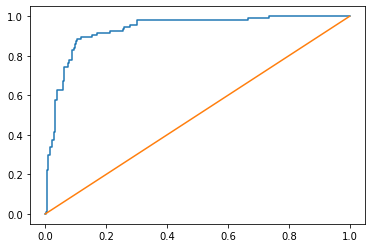

In [30]:
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
